In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
import pickle
from xgboost import plot_tree
from mpl_toolkits.mplot3d import Axes3D



In [2]:
# #############################################################################
# Real benchmarked dataset
#data = pd.read_csv('../../RealData/RealData_nginx_small.csv')
data = pd.read_csv('../../RealData/RealData_nginx_big.csv')

#data = pd.read_csv('../../RealData/RealData_haproxy_small.csv')
#data = pd.read_csv('../../RealData/RealData_haproxy_big.csv')

#data = pd.read_csv('../../RealData/RealData_squid_small.csv')
#data = pd.read_csv('../../RealData/RealData_squid_big.csv')

## Log Syn. Data
#data = pd.read_csv('../../SynData/data/GeneratedLogData.csv')



In [3]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']


X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [4]:
# #############################################################################
# Fit XGB regression model
clf = xgb.XGBRegressor()
#clf = GridSearchCV(xgb_model, {'max_depth': [3, 4, 6, 8, 9, 10], 'n_estimators': [100, 110, 200]}, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

#{'eta': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 1}

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [5]:
prediction = clf.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Throuput,Actual,Predicted
0,0.004253,0.1,0.100126
1,0.002253,0.1,0.100126
2,0.003328,0.1,0.100126
3,0.004491,0.1,0.100126
4,0.002241,0.1,0.100126
5,0.003463,0.1,0.100126
6,0.002528,0.1,0.100126
7,0.004829,0.1,0.100126
8,0.003408,0.1,0.100126
9,0.002335,0.1,0.100126


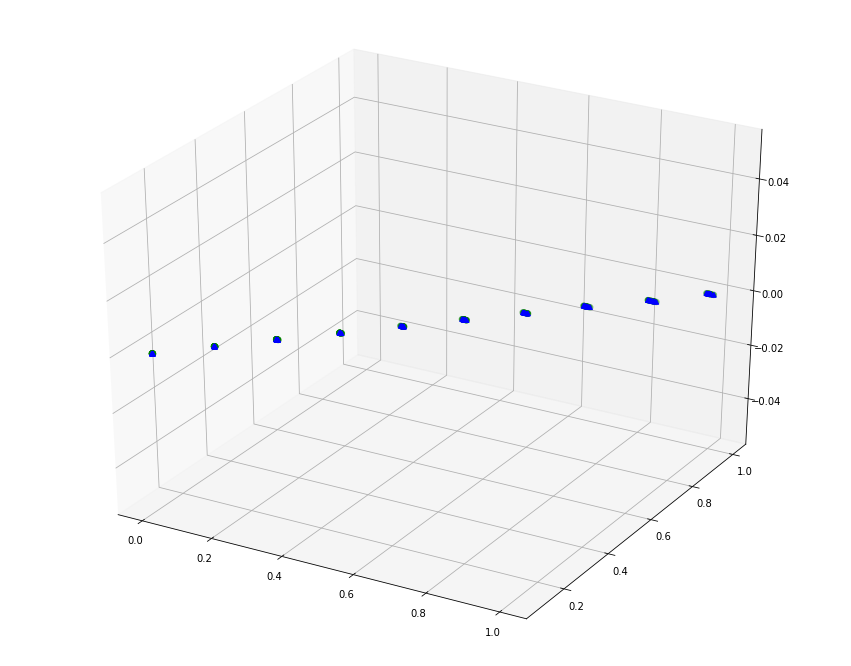

In [6]:


fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test , y_test,
           c='blue',
           marker='^',
           alpha=1)
ax.scatter(X_test,prediction.reshape(X_test.shape), color="g", linewidth=2)


#plot_tree(clf) 
#fig = plt.gcf()
#fig.set_size_inches(150, 100)
#plt.show()
#sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
#sns.residplot(X_test.flatten(), y_test, lowess=True, color="g")

MAE: 4.673279821872673e-05
MSE: 4.5848647194369495e-09
RMSE: 6.771162912998734e-05


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


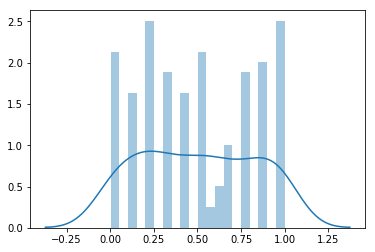

In [7]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
sns.distplot(X_test,bins=20)

In [8]:
# save the model to disk
filename = '../models/XGB_nginx_big_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [9]:
data = scaler.transform(np.float32([[30]])) 
print(data)

[[-0.0741127]]


In [10]:
clf.predict(data)

array([0.10012606], dtype=float32)